## PROJECT 1

#### Context
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### Goal
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

#### Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats.mstats import winsorize

#### Dataset

Link: https://www.kaggle.com/datasets/royjafari/customer-churn/data

This project utilizes a public dataset of 66,469 customers from an anonymous telecommunications company.

In [ ]:
df = pd.read_csv('Midterm_Project\\Customer_Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.000000,6.000,12.000000,36.000
Complains,3150.0,0.076508,0.265851,0.0,0.000000,0.000,0.000000,1.000
Subscription Length,3150.0,32.541905,8.573482,3.0,30.000000,35.000,38.000000,47.000
Charge Amount,3150.0,0.942857,1.521072,0.0,0.000000,0.000,1.000000,10.000
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.250000,2990.000,6478.250000,17090.000
Frequency of use,3150.0,69.460635,57.413308,0.0,27.000000,54.000,95.000000,255.000
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.000000,21.000,87.000000,522.000
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.000000,21.000,34.000000,97.000
Age Group,3150.0,2.826032,0.892555,1.0,2.000000,3.000,3.000000,5.000
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.000000,1.000,1.000000,2.000


### EDA

Checking for null values

In [5]:
null = df.isnull().sum().sum()
print('There is {} null values in the Data Frame'.format(null))

There is 0 null values in the Data Frame


Unique values for each column

In [6]:
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
FN                         2654
FP                         2195
Churn                         2
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
2846,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
2847,8,1,11,2,1792,25,7,9,3,1,1,30,100.680,90.6120,60.0680,1
2848,26,0,38,9,10740,99,8,44,5,2,1,55,174.585,157.1265,67.4585,0


Target class

C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\2614508111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\2614508111.py:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10)


<Axes: xlabel='Churn', ylabel='count'>

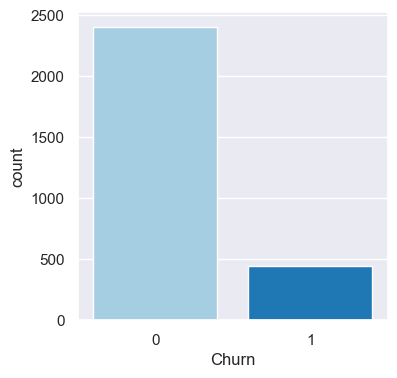

In [8]:
sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10)

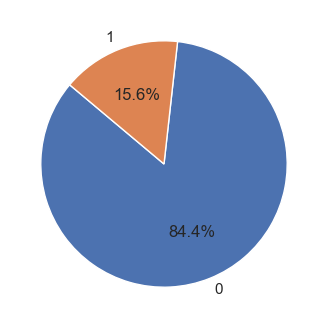

In [9]:
# Count the number of occurrences for each label
label_counts = df['Churn'].value_counts()

# Create a bar chart
plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Distribution of Negative (0) and Positive (1)')
plt.show()

This dataset isn't balanced. 

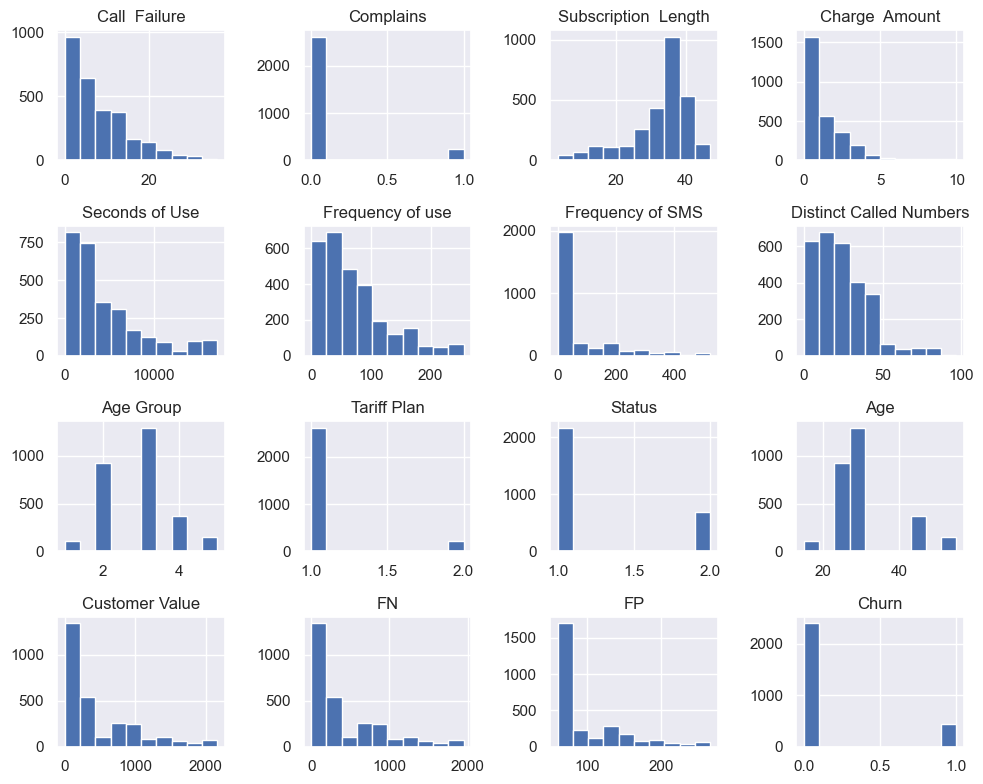

In [10]:
#plt.figure(figsize=(20,6))
ax = df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

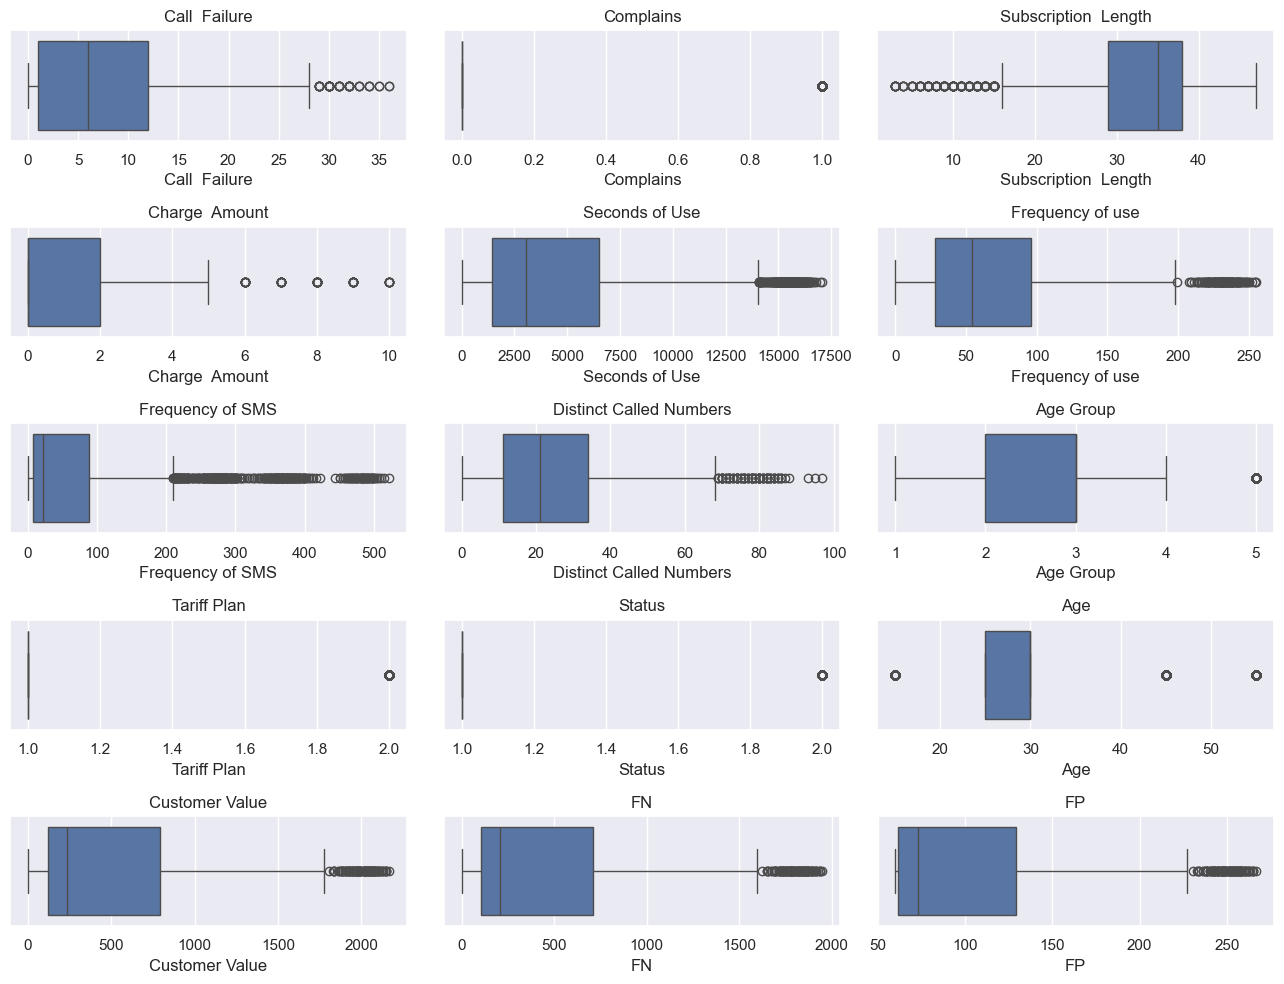

In [11]:
dfcols = df.columns
inputs = list(dfcols)
# Determine the number of logging curves
num_inputs = len(inputs)
# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(5, 3, figsize=(13,10))
# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(x=df[curve], ax=ax) 
    ax.set_title(inputs[i])
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

For features:

- Call Failure
- Subscription Lenght
- Charge Amount
- Seconds of Use
- Frecuency of Use
- Frecuency of SMS
- Distinct Called Numbers
- Age
- Customer Value
- FN
- FP

The values are either skewed to the left or right, and there is presence of outliers.

#### OUTLIERS

Detecting outliers using Z-scores method

In [ ]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
num_cols_outliers = []
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    sample_outliers = detect_outliers_zscore(df[col])
    print('Column: ', col, '; Outliers: ', len(sample_outliers))
    if len(sample_outliers)>0:
        num_cols_outliers.append(col)

Column:  Call  Failure ; Outliers:  37
Column:  Complains ; Outliers:  230
Column:  Subscription  Length ; Outliers:  26
Column:  Charge  Amount ; Outliers:  62
Column:  Seconds of Use ; Outliers:  0
Column:  Frequency of use ; Outliers:  18
Column:  Frequency of SMS ; Outliers:  60
Column:  Distinct Called Numbers ; Outliers:  53
Column:  Age Group ; Outliers:  0
Column:  Tariff Plan ; Outliers:  229
Column:  Status ; Outliers:  0
Column:  Age ; Outliers:  0
Column:  Customer Value ; Outliers:  45
Column:  FN ; Outliers:  45
Column:  FP ; Outliers:  51
Column:  Churn ; Outliers:  0


Remove Outliers using Winsorize method

In [ ]:
for col in num_cols_outliers:
    df[col] = winsorize(df[col],limits = [0.10, 0.10], inplace = True)

Cheking of the elimination of outliers

In [ ]:
num_cols_outliers = []
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    sample_outliers = detect_outliers_zscore(df[col])
    print('Column: ', col, '; Outliers: ', len(sample_outliers))
    if len(sample_outliers)>0:
        num_cols_outliers.append(col)

Column:  Call  Failure ; Outliers:  0
Column:  Complains ; Outliers:  0
Column:  Subscription  Length ; Outliers:  0
Column:  Charge  Amount ; Outliers:  0
Column:  Seconds of Use ; Outliers:  0
Column:  Frequency of use ; Outliers:  0
Column:  Frequency of SMS ; Outliers:  0
Column:  Distinct Called Numbers ; Outliers:  0
Column:  Age Group ; Outliers:  0
Column:  Tariff Plan ; Outliers:  0
Column:  Status ; Outliers:  0
Column:  Age ; Outliers:  0
Column:  Customer Value ; Outliers:  0
Column:  FN ; Outliers:  0
Column:  FP ; Outliers:  0
Column:  Churn ; Outliers:  0


C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\2312815998.py:10: RuntimeWarning: invalid value encountered in scalar divide
  z_score = (i-mean)/std


Distribution of Age Group

C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\2302947571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age Group", data=df, palette=sns.color_palette("husl", 8), saturation=10)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\2302947571.py:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(x="Age Group", data=df, palette=sns.color_palette("husl", 8), saturation=10)


<Axes: xlabel='Age Group', ylabel='count'>

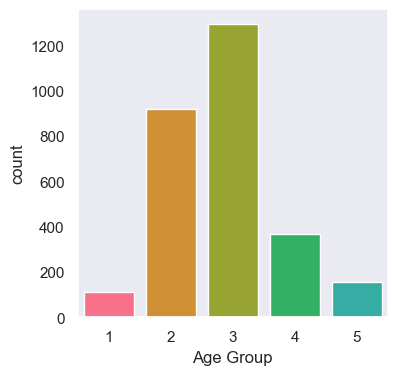

In [15]:
sns.set_style("dark")
sns.countplot(x="Age Group", data=df, palette=sns.color_palette("husl", 8), saturation=10)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\3005787225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Charge  Amount", data=df, palette=sns.color_palette("husl", 8), saturation=10)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\3005787225.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x="Charge  Amount", data=df, palette=sns.color_palette("husl", 8), saturation=10)


<Axes: xlabel='Charge  Amount', ylabel='count'>

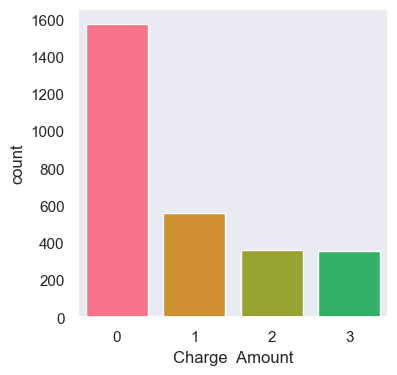

In [16]:
sns.set_style("dark")
sns.countplot(x="Charge  Amount", data=df, palette=sns.color_palette("husl", 8), saturation=10)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_20532\144284651.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="Age Group", data=df, palette=sns.color_palette("husl", 8), saturation=10, hue="Churn")


<Axes: xlabel='Age Group', ylabel='count'>

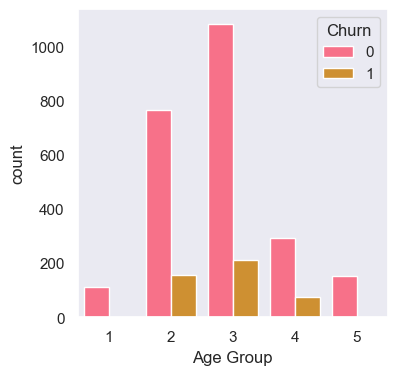

In [17]:
sns.set_style("dark")
sns.countplot(x="Age Group", data=df, palette=sns.color_palette("husl", 8), saturation=10, hue="Churn")

Correlation Inspection

<Axes: >

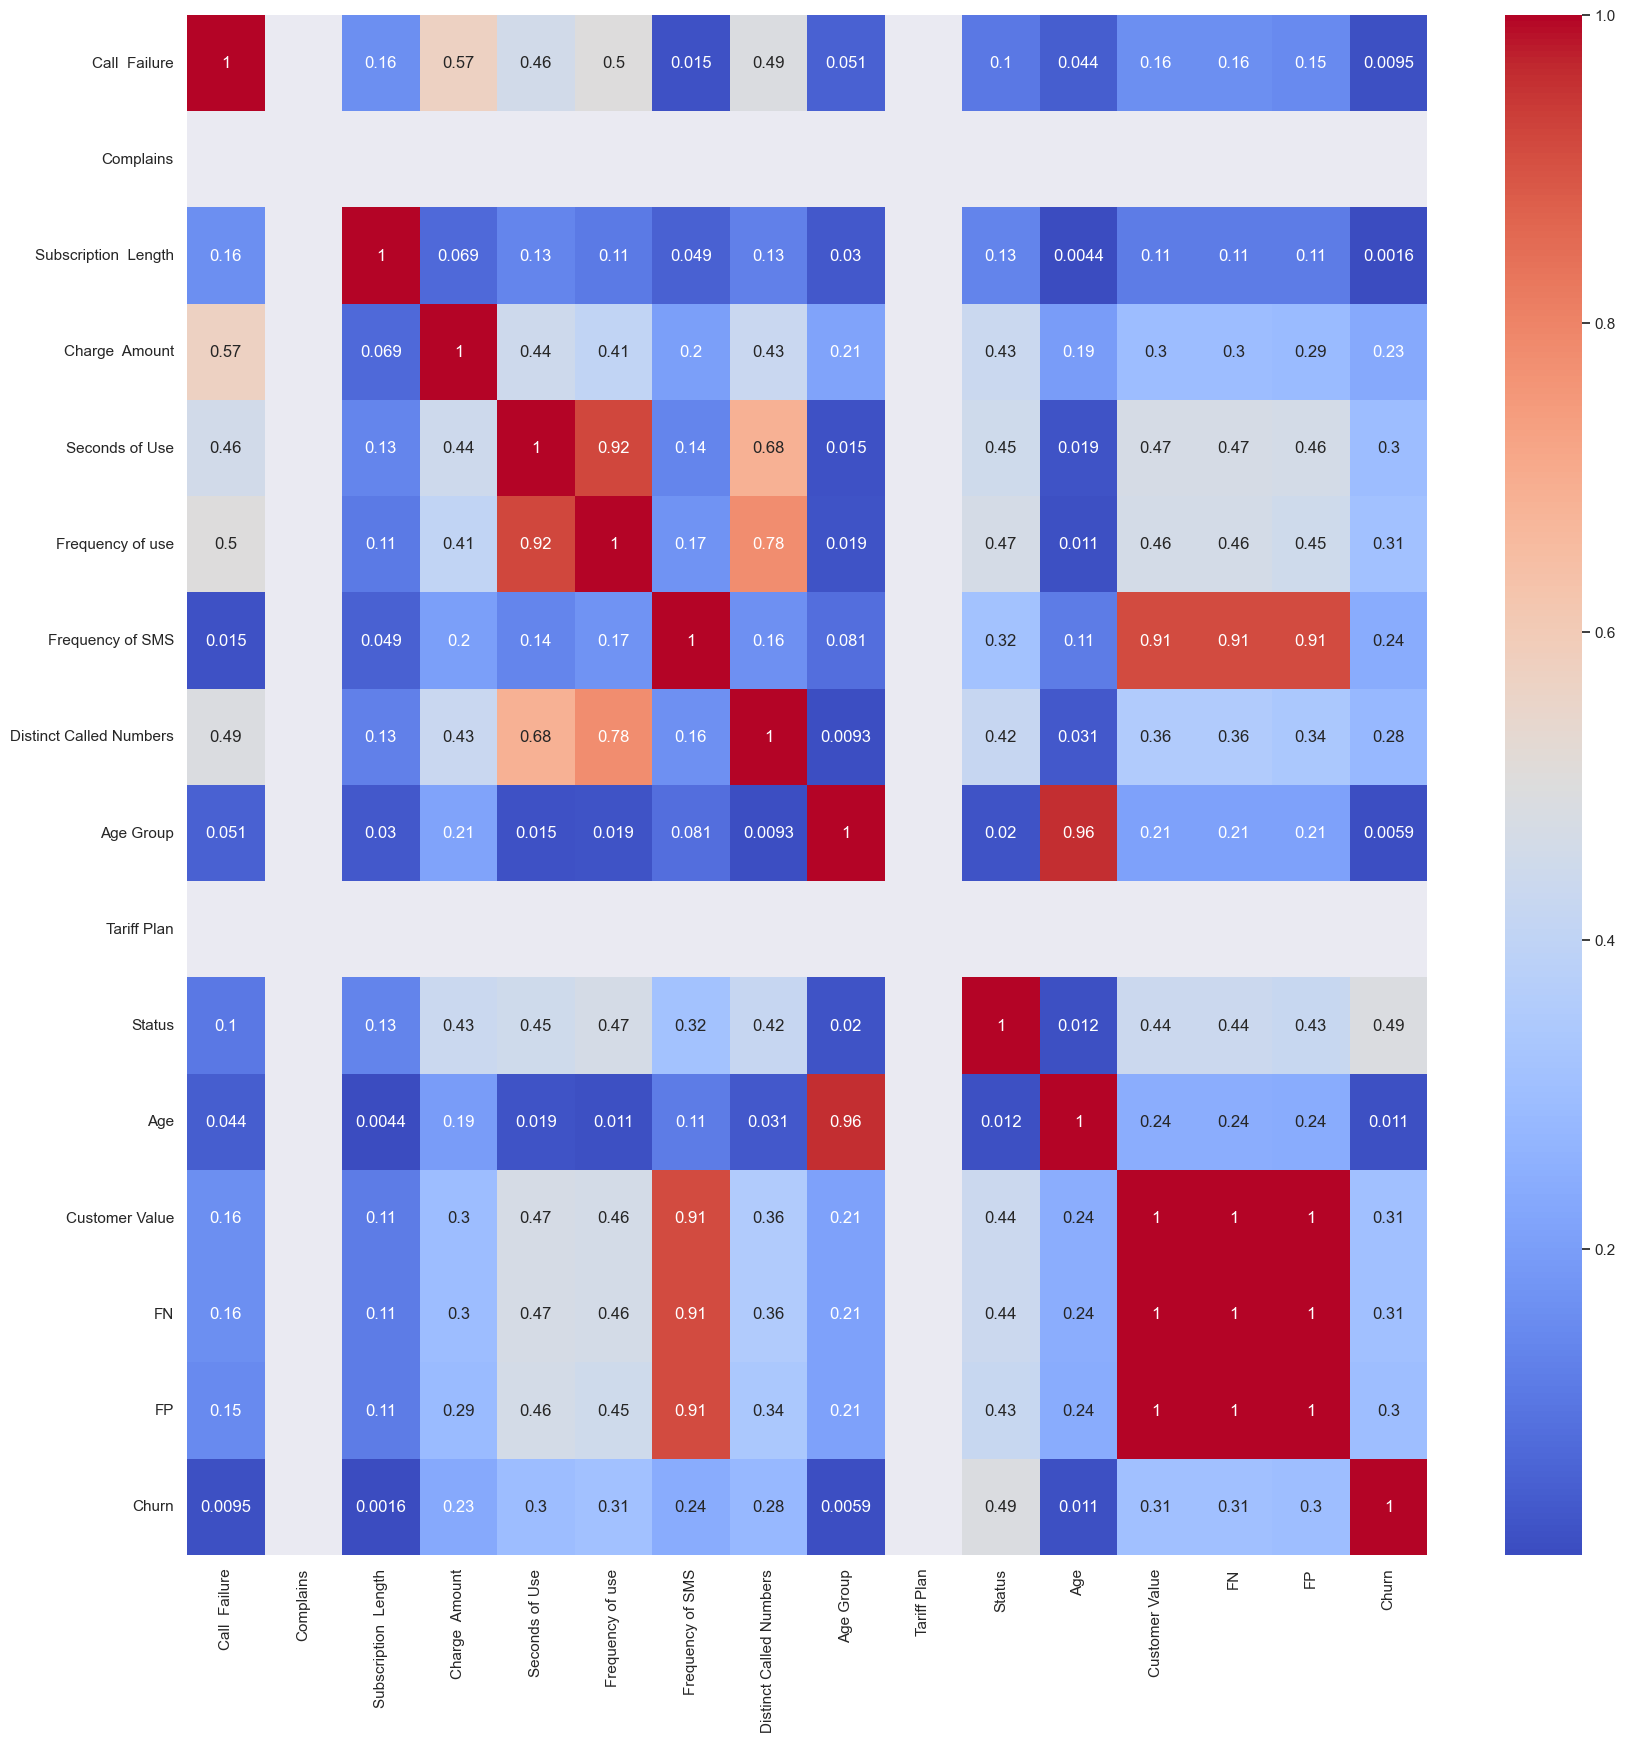

In [18]:
fig, ax = plt.subplots(figsize=(20,20)) 
full_corr_matrix = df.corr().abs()
sns.heatmap(full_corr_matrix, annot=True, cmap='coolwarm')

In [19]:
corr_matrix = df.corr()['Churn'].abs()
print(corr_matrix.sort_values(ascending=False))

Churn                      1.000000
Status                     0.492867
Frequency of use           0.311510
Customer Value             0.307724
FN                         0.307724
FP                         0.300391
Seconds of Use             0.295999
Distinct Called Numbers    0.282312
Frequency of SMS           0.240048
Charge  Amount             0.231916
Age                        0.011491
Call  Failure              0.009466
Age Group                  0.005891
Subscription  Length       0.001607
Complains                       NaN
Tariff Plan                     NaN
Name: Churn, dtype: float64


'Age Group' very correlated with 'Age'

'Seconds of Use' very correlated with 'Frequency of use'

'FN' and 'FP' very correlated with 'Customer Value '

In [20]:
df.drop(["Age Group"], axis=1, inplace=True)
df.drop(["Seconds of Use"], axis=1, inplace=True)
df.drop(["FN"], axis=1, inplace=True)
df.drop(["FP"], axis=1, inplace=True)

Split the dataset into features and target variable

In [21]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
print(X.shape)
print(y.shape)

(2850, 11)
(2850,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state =42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2280, 11) (2280,)
(570, 11) (570,)


#### Model Selection

In [25]:
models=[LinearSVC(),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier()]
model_names=['LinearSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier']
acc_score=[]
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_score.append(accuracy_score(pred,y_test))  
d={'Models':model_names,'Accuracy':acc_score}
acc_table=pd.DataFrame(d)
print(acc_table)

                       Models  Accuracy
0                   LinearSVM  0.845614
1           KNearestNeighbors  0.901754
2      RandomForestClassifier  0.942105
3                DecisionTree  0.919298
4  GradientBoostingClassifier  0.928070


The best model is RandomForest!